# EDEN NOTEBOOK # 1: SOC Code Job Description NLP 

# Description of Use Case:

jkflsjklsd

## Description of Approach:

__Source:__ https://www.analyticsvidhya.com/blog/2018/04/a-comprehensive-guide-to-understand-and-implement-text-classification-in-python/ 

Text Classification is an example of supervised machine learning task since a labelled dataset containing text documents and their labels is used to train a classifier. An end-to-end text classification pipeline is composed of three main components:

1. **Dataset Preparation:** The first step is the Dataset Preparation step which includes the process of loading a dataset and performing basic pre-processing. The dataset is then splitted into train and validation sets.
2. **Feature Engineering:** The next step is the Feature Engineering in which the raw dataset is transformed into flat features which can be used in a machine learning model. This step also includes the process of creating new features from the existing data.
3. **Model Training:** The final step is the Model Building step in which a machine learning model is trained on a labelled dataset.
4. **Improve Performance of Text Classifier:** In this article, we will also look at the different ways to improve the performance of text classifiers.

We will be using Scikit-learn for some of our training. Here is helpful guide to the packages that are useful for us:

## Getting your machine ready

Lets implement basic components in a step by step manner in order to create a text classification framework in python. To start with, import all the required libraries.

You would need requisite libraries to run this code – you can install them using pip install x (for example: pip install Pandas) frm the command prompt.

- Pandas
- Scikit-learn
- XGBoost
- TextBlob
- Keras
- Gensim
- Tensorflow

In [1]:
# libraries for dataset preparation, feature engineering, model training 

# For basic data wrangling 
import pandas as pd
import numpy as np

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

# For word2vec:
import gensim
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

# For reporting how how each cell takes to run
import time

#set up print formating specifications:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    
    
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

C:\Users\583621\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Assign Appropriate Paths

In [2]:
# User's Location of git repository
Git_Location = 'C:/Users/583621/OneDrive - Booz Allen Hamilton/Billable Projects/DOL/DAC/SOC Code Use Case/'

# Set Data Location:
FLAG_data = Git_Location + 'NLP_usecase_data_10000/Job_description_full.csv'  #65 k

# Set Training Data location: (run the %run to refresh the onet training data every August after the D has been refreshed)
# %run Git_Location + 'SOC Code Onet Training Data Manipulation.ipynb'
onet_data = Git_Location + 'NLP_usecase_data_10000/soc_full_onet_descriptions.csv'

# 1. Dataset preparation

To prepare the dataset, load the downloaded data into a pandas dataframe containing two columns – text and label. (Source)


In [3]:
%%time

# load the FLAG data
flagdf = pd.read_csv(FLAG_data,low_memory=False,thousands=',', encoding='latin-1')
flagdf = flagdf[['SOC_CODE','JOB_DUTIES']]
flagdf = flagdf.rename(columns={"SOC_CODE": "label", "JOB_DUTIES": "text"})

onetDF = pd.read_csv(onet_data,low_memory=False,thousands=',')
onetDF = onetDF.rename(columns={"O*NET-SOC Code": "label", "SOC Description str": "text"})

df = flagdf.append(onetDF, ignore_index=True)

print(color.BOLD + "Data Type of df:" + color.END,df.shape)
print(type(df))
print(" ")
print(color.BOLD + "Quick preview of the data:" + color.END)
print(df.head())
print(" ")
print(color.BOLD + "Here is what one full job description looks like (sample):" + color.END)
print("")
print(df.iloc[733,1])

Data Type of df: (62439, 2)
<class 'pandas.core.frame.DataFrame'>
 
Quick preview of the data:
        label                                               text
0  15-1132.00  Ensuring best practices are followed by enforc...
1  13-1111.00  Manage the design and development of long-term...
2  27-1011.00  Lead Motion Graphics Designer (The Boston Cons...
3  17-2071.00  Design and develop solutions for server system...
4  49-3023.01  Repairs and overhauls gasoline vehicles. Exami...
 
Here is what one full job description looks like (sample):

Produce solution design, architecture, software programming/coding, testing and deployment. Analyze technology product and service issues, customer service issues, trouble tickets and perform software programming and testing to design and develop solutions, and resolve the issues. Apply knowledge of optical fiber communication to effectively transform engineering platform into robust and dynamic computer system. Use Geo Spatial data transformation t

### Imbalanced Classes
We see in the cell below that the SOC code label frequency is imbalanced. There are many codes that have only one occurance or are not represented at all.

When we encounter such problems, we are bound to have difficulties solving them with standard algorithms. Conventional algorithms are often biased towards the majority class, not taking the data distribution into consideration. In the worst case, minority classes are treated as outliers and ignored. For some cases, such as fraud detection or cancer prediction, we would need to carefully configure our model or artificially balance the dataset, for example by undersampling or oversampling each class.

However, in our case of learning imbalanced data, the majority classes might be of our great interest. It is desirable to have a classifier that gives high prediction accuracy over the majority class, while maintaining reasonable accuracy for the minority classes. Therefore, we will leave it as it is. Perhaps we can use the O*NET data to classify the the ill represented classes.

In [4]:
print("Label freqency report:")
print(df.label.value_counts())

#So let's limit out dataset to only the most common (n) SOC codes to test the best case results (assuming we can get more data later)
df = df.groupby('label').filter(lambda x: len(x) >= 400)

# print("Filtered Label freqency report:")
print(df.label.value_counts())

Label freqency report:
15-1132.00    12158
15-1133.00     4915
15-1121.00     3853
17-2072.00     1889
15-2041.00     1299
11-3021.00     1250
15-1199.01     1150
11-2021.00     1018
13-2051.00      984
17-2141.00      961
15-1199.09      950
29-1141.00      932
37-3011.00      885
13-2011.01      820
13-1161.00      757
13-1111.00      704
29-1123.00      701
35-2014.00      644
15-1142.00      622
41-9031.00      610
17-2071.00      600
17-2112.00      566
15-1141.00      483
11-1021.00      464
25-1071.00      427
29-1069.00      403
17-2051.00      385
11-3031.02      353
11-9041.00      336
15-1122.00      325
              ...  
53-1011.00        1
49-2093.00        1
13-1041.03        1
43-5052.00        1
49-9096.00        1
31-9099.01        1
43-9081.00        1
19-4051.01        1
11-3051.02        1
43-5053.00        1
29-1141.03        1
43-4181.00        1
53-3022.00        1
53-5011.00        1
47-2072.00        1
33-3052.00        1
13-1041.04        1
39-9099.00       

In [5]:
%%time
#clean

# Remove returns and tabs and slashes
df['text']=df['text'].str.replace('\n', ' ',regex=True, case = False).str.strip()
df['text']=df['text'].str.replace('\s+', ' ',regex=True, case = False)
df['text']=df['text'].str.replace('/', ' ',regex=True, case = False).str.strip()

# lower case everything
df['text']=df['text'].str.lower()
#Remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
#stop_words = ('ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

#Convert label to float
df['label']=df['label'].str.replace('-', '',regex=True, case = False).str.strip()
df['label']=df['label'].astype('float64', raise_on_error = False)

#eliminate all other characters/nmbers except alphas and spaces
list1 = []
whitelist = set('abcdefghijklmnopqrstuvwxyz ABCDEFGHIJKLMNOPQRSTUVWXYZ')
for index, row in df.iterrows():
    list1.append(''.join(filter(whitelist.__contains__, row['text'])).strip())
    
newdf = pd.DataFrame({'text clean':list1})
df = df.reset_index()
df = pd.merge(df, newdf, left_index=True, right_index=True)

#rename the soc des str var
df = df[['label','text clean']]
df['text'] = df['text clean']
df = df[['label','text']]

# Validate
print(color.BOLD + "Total row/col count:" + color.END, df.shape)
print(" ")
print(color.BOLD + "Quick preview of the cleaned data:" + color.END)
print(df.head())
print(" ")
print(color.BOLD + "Now the same full clean job description (sample):" + color.END)
print("")
print(df.iloc[733,1])

Total row/col count: (40045, 2)
 
Quick preview of the cleaned data:
      label                                               text
0  151132.0  ensuring best practices followed enforcing cod...
1  131111.0  manage design development longterm business st...
2  172071.0  design develop solutions server system applica...
3  151132.0  research analyze design propose deliver archit...
4  152041.0  formulate apply modeling optimizing methods de...
 
Now the same full clean job description (sample):

build develop backend services media processing deliver rich media content front hundreds millions users design implement backend service components ingest process deliver millions media assets every day design build maintain support services enable media twitter applying software engineering techniques unit testing code reviews design documentation build develop reliable large scale distributed systems maintain test code mentor junior engineers collaboration product management deliver cutting e

Next, if you have one dataset, you will need to split it into **training** and **validation** sets so that we can train and test classifier. 

Also, we will have the option to encode our target column so that it can be used in machine learning models.

In [6]:
%%time
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['text'], df['label'])

#Reset the indexes on the validation sets for validation
valid_y = valid_y.reset_index(drop=True)
valid_x = valid_x.reset_index(drop=True)

# We will also copy the validation datasets to a dataframe to be able to merge later on
valid_x_df = pd.DataFrame(valid_x)
valid_y_df = pd.DataFrame(valid_y)

# label encode the target variable 
# encoder = preprocessing.LabelEncoder()
# train_y = encoder.fit_transform(train_y)
# valid_y = encoder.fit_transform(valid_y)

Wall time: 22 ms


In [9]:
%%time
#validate above cell:

print(color.BOLD + "train_x row/col count:" + color.END, train_x.shape)
print(color.BOLD + "train_x head:" + color.END)
print(train_x.head())

print(" ")
print(color.BOLD + "valid_x row/col count:" + color.END, valid_x.shape)
print(color.BOLD + "valid_x head:" + color.END)
print(valid_x.head())

print(" ")
print(color.BOLD + "train_y row count:" + color.END, train_y.shape)
print(color.BOLD + "train_y first 10 values:" + color.END)
print(train_y[0:10])

print(" ")
print(color.BOLD + "valid_y row count:" + color.END, valid_y.shape)
print(color.BOLD + "valid_y first 10 values:" + color.END)
print(valid_y[0:10])

train_x row/col count: (46829,)
train_x head:
43906    construct erect install repair structures fixt...
46108    facilitate workflow process online game projec...
5600     responsible piloting new hardware software pro...
117      diagnose problems childrens teeth gums related...
15977    analyzes designs programs debugs modifies soft...
Name: text, dtype: object
 
valid_x row/col count: (15610,)
valid_x head:
0    assist design planning implementation network ...
1    supervision administrator supervisor provide g...
2    task chief chef  work chefs personnel plan men...
3    build customer relationships support customers...
4    design develop software contribute cuttingedge...
Name: text, dtype: object
 
train_y row count: (46829,)
train_y first 10 values:
43906    472031.01
46108    151121.00
5600     172112.00
117      291029.00
15977    151132.00
3199     151132.00
27889    513022.00
24262    273091.00
47290    151132.00
10431    151132.00
Name: label, dtype: object
 
valid_y ro

# 2. Feature Engineering

The next step is the feature engineering step. In this step, raw text data will be transformed into feature vectors and new features will be created using the existing dataset. We will implement the following different ideas in order to obtain relevant features from our dataset.

2.1 Count Vectors as features <br>
2.2 TF-IDF Vectors as features <br>

- Word level
- N-Gram level
- Character level

2.3 Word Embeddings as features <br>
2.4 Text / NLP based features <br>
2.5 Topic Models as features <br>

Lets look at the implementation of these ideas in detail.

## 2.1 Count Vectors as features

Count Vector is a matrix notation of the dataset in which every row represents a document from the corpus, every column represents a term from the corpus, and every cell represents the frequency count of a particular term in a particular document.

Like this:

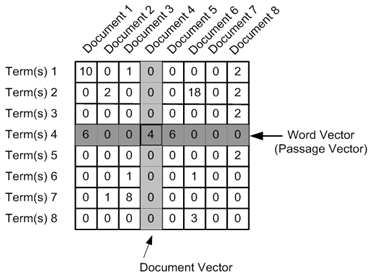

In [8]:
%%time
# create a count vectorizer object 

count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(train_x)

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

Wall time: 28.5 s


## 2.2 TF-IDF Vectors as features

TF-IDF score represents the relative importance of a term in the document and the entire corpus. TF-IDF score is composed by two terms: the first computes the normalized Term Frequency (TF), the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)
IDF(t) = log_e(Total number of documents / Number of documents with term t in it)

TF-IDF Vectors can be generated at different levels of input tokens (words, characters, n-grams)

**a. Word Level TF-IDF:** Matrix representing tf-idf scores of every term in different documents <br>
**b. N-gram Level TF-IDF:** N-grams are the combination of N terms together. This Matrix representing tf-idf scores of N-grams<br>
**c. Character Level TF-IDF:** Matrix representing tf-idf scores of character level n-grams in the corpus<br>

![_auto_0](attachment:_auto_0)

In [9]:
%%time
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df['text'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(df['text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(df['text'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

Wall time: 5min 54s


## 2.3 Word Embeddings

A word embedding is a form of representing words and documents using a dense vector representation. The position of a word within the vector space is learned from text and is based on the words that surround the word when it is used. This essentially helps your model understand the concept of context. For example:

        - if earth=1 and water=1, then dirt might= 0.5

Word embeddings can be trained using the input corpus itself or can be generated using pre-trained word embeddings such as **Glove, FastText,** and **Word2Vec**. Any one of them can be downloaded and used as transfer learning. One can read more about word embeddings at the link below.

https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/

**Illustrative Example:**

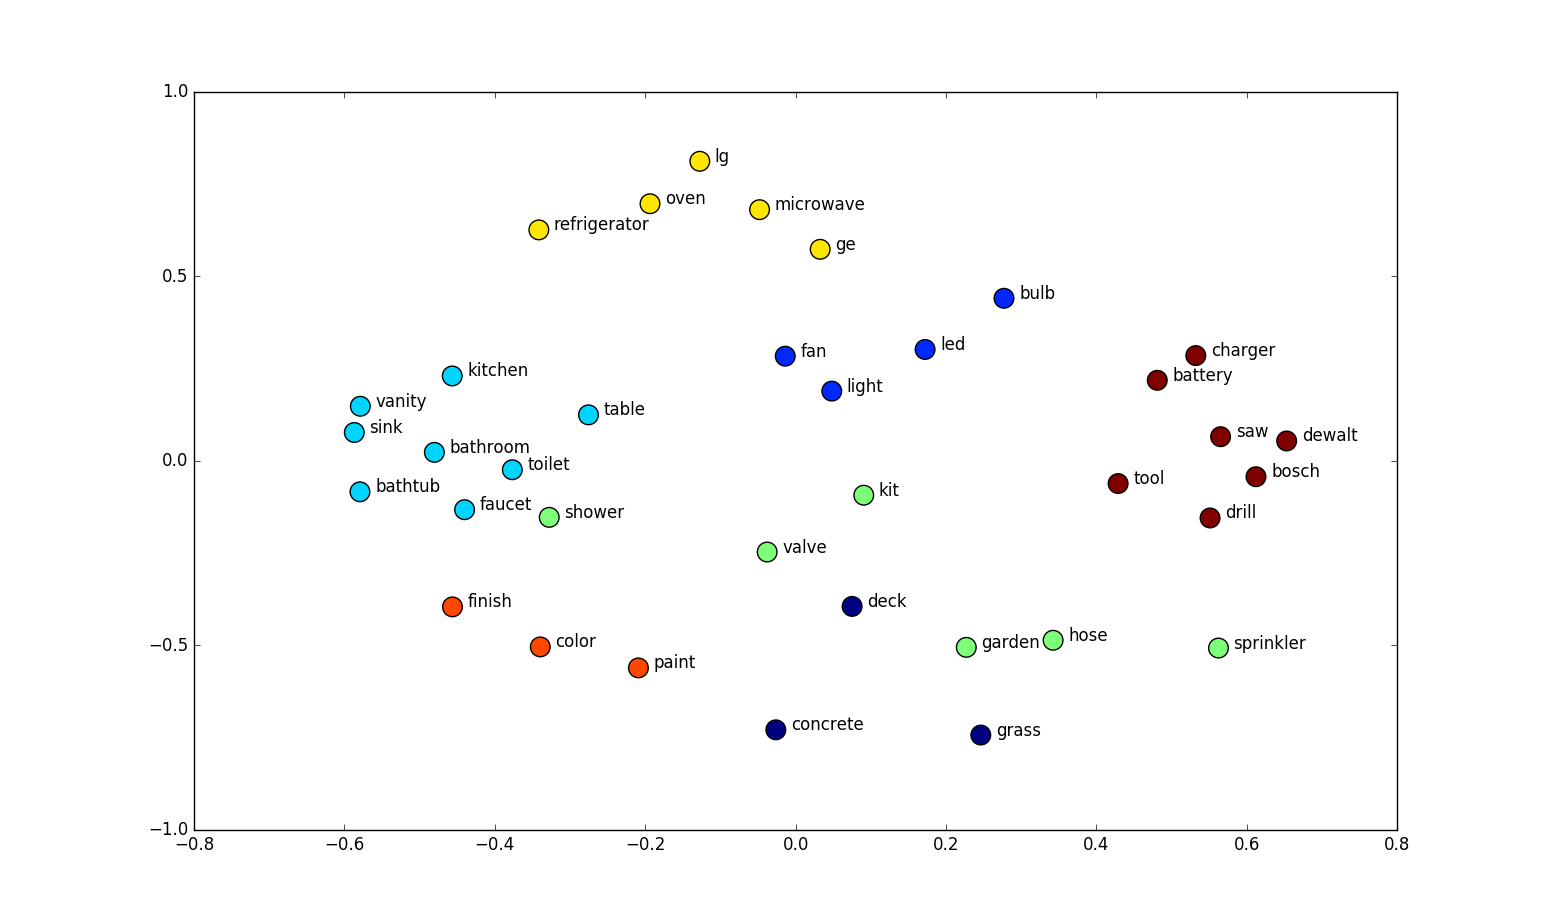

### 2.3.1 Training  our own Word Vectors

Sources:

- https://www.kaggle.com/liananapalkova/simply-about-word2vec
- https://medium.freecodecamp.org/how-to-get-started-with-word2vec-and-then-how-to-make-it-work-d0a2fca9dad3

In [1]:
%%time
# convert train dataframe to list of lists called descriptions
# We will use the function "simple_preprocess" of GenSim package in order to transform each question (row) into a set of tokens
# for example: "what is your name" -> "what", "is", "your", "name".
def convert(row,column_name):
    return gensim.utils.simple_preprocess(str(row[column_name]).encode('utf-8'))
    
descriptions = []
for index, row in df.iterrows():
    descriptions.append(convert(row,"text"))

NameError: name 'df' is not defined

In [11]:
%%time
#model = Word2Vec(descrptions, min_count=1,size=150,workers=10)
model = gensim.models.Word2Vec(size=150, window=5, min_count=2, sg=1, workers=10)
model.build_vocab(descriptions)  # prepare the model vocabulary

#training the model
model.train(sentences=descriptions, total_examples=len(descriptions), epochs=model.iter)

C:\Users\583621\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  


Wall time: 1min 59s


In [12]:
%%time
# Let's explore the vocab list
word_vectors = model.wv
count = 0
for word in word_vectors.vocab:
    if count<10:
        print(word)
        count += 1
    else:
        break

senior
networks
database
architects
programs
analysts
duties
perform
requirements
gathering
Wall time: 1 ms


In [13]:
%%time
# Take it for a test spin!
# wv.most_similar allows us to plug in a single word and see what words in our corpus are most similar to it!
model.wv.most_similar(positive='longterm')

Wall time: 66.2 ms


[('shortterm', 0.7537789940834045),
 ('nearterm', 0.6506304144859314),
 ('shortand', 0.6462094783782959),
 ('short', 0.6259952783584595),
 ('timebound', 0.6133334636688232),
 ('long', 0.5946742296218872),
 ('geared', 0.5828437805175781),
 ('substantial', 0.5751112103462219),
 ('resourcing', 0.5735809206962585),
 ('oaths', 0.573539674282074)]

In [14]:
%%time
#how many words are in our vocabulary?
len(word_vectors.vocab)

Wall time: 0 ns


18343

The embedded vectors for a specific token are stored in a KeyedVectors instance in "model.wv". We can see that the length of a word vector is equal to 150 as we defined by the parameter "size":

In [15]:
%%time
vector = model.wv["senior"]  # numpy vector of a word
print(len(vector))
print(vector)

150
[ 2.58477964e-03 -3.99572194e-01  3.54889333e-01  1.75659135e-01
  6.20693155e-02  5.01879573e-01 -2.89522976e-01  2.34770551e-02
  2.67819732e-01 -5.39636433e-01 -1.29804254e-01  4.00864743e-02
 -1.22769866e-02 -2.23044902e-01 -5.87341249e-01  3.29031311e-02
 -1.50625631e-01 -1.14192210e-01 -2.55352527e-01  4.01601017e-01
  4.55648929e-01 -2.13368878e-01 -1.03157334e-01 -2.42344752e-01
 -4.05517220e-01 -2.23722942e-02 -1.70407265e-01 -4.70363051e-01
 -7.07145259e-02 -9.38240290e-02 -3.01199138e-01 -3.33738893e-01
  6.37001544e-02  6.01394363e-02 -4.47413363e-02  1.97255518e-03
  1.02488520e-02  8.27864766e-01 -3.68419081e-01 -3.94943684e-01
  7.56579101e-01  1.30208014e-02 -1.82778671e-01  4.73712273e-02
 -3.99922729e-01  7.15309829e-02 -5.56602418e-01 -8.55557323e-02
  1.62128493e-01 -9.49448571e-02  4.25923795e-01 -4.99168515e-01
 -3.86218190e-01  4.46550965e-01 -1.65175705e-03  5.04308045e-01
  4.79553044e-01 -4.11902934e-01 -2.26328164e-01  2.16143146e-01
  2.62268037e-01 -4.4

We can now create a two-dimensional semantic representation of word embeddings using t-SNE.

In [16]:
%%time
wanted_words = []
count = 0
for word in word_vectors.vocab:
    if count<15000: #change this number if you want less or more
        wanted_words.append(word)
        count += 1
    else:
        break
embeddings_index = dict((k, model.wv[k]) for k in wanted_words if k in word_vectors.vocab)

#take a look:
from itertools import islice
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))
n_items = take(10, embeddings_index.items())
n_items

Wall time: 121 ms


### 2.3.2 Using pre-trained word embeddings
We also have the option of using a pre-trained word embeddings in the model, but i don't think we'll be able to download this type of open source data. I also think using our own model will be better. 

The following snnipet shows how to use pre-trained word embeddings in the model. There are four essential steps:

1. Loading the pretrained word embeddings
2. Creating a tokenizer object
3. Transforming text documents to sequence of tokens and pad them
4. Create a mapping of token and their respective embeddings <br>

You can download the pre-trained word embeddings from here: https://s3-us-west-1.amazonaws.com/fasttext-vectors/wiki-news-300d-1M.vec.zip

In [17]:
%%time
# Either load the pre-trained word-embedding vectors 
# embeddings_index = {}
# for i, line in enumerate(open(Git_Location + 'NLP_usecase_data_10000/wiki-news-300d-1M.vec', encoding="utf8")):
#     values = line.split()
#     embeddings_index[values[0]] = numpy.asarray(values[1:], dtype='float32')

# Take a look
# from itertools import islice
# def take(n, iterable):
#     "Return first n items of the iterable as a list"
#     return list(islice(iterable, n))
# n_items = take(10, embeddings_index.items())
# n_items

Wall time: 0 ns


### 2.3.3 Create token-embedding mapping

In [18]:
%%time
# create a tokenizer 
token = text.Tokenizer()
token.fit_on_texts(df['text'])
word_index = token.word_index

# convert text to sequence of tokens and pad them to ensure equal length vectors 
train_seq_x = sequence.pad_sequences(token.texts_to_sequences(train_x), maxlen=70)
valid_seq_x = sequence.pad_sequences(token.texts_to_sequences(valid_x), maxlen=70)

# create token-embedding mapping
embedding_matrix = numpy.zeros((len(word_index) + 1, 150))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word) 
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

Wall time: 11.2 s


## 2.4 Text / NLP based features

A number of extra text based features can also be created which sometimes are helpful for improving text classification models. Some examples are:

1. Word Count of the documents – total number of words in the documents
2. Character Count of the documents – total number of characters in the documents
3. Average Word Density of the documents – average length of the words used in the documents
4. Puncutation Count in the Complete Essay – total number of punctuation marks in the documents
5. Upper Case Count in the Complete Essay – total number of upper count words in the documents
6. Title Word Count in the Complete Essay – total number of proper case (title) words in the documents
7. Frequency distribution of Part of Speech Tags:

> - Noun Count
> - Verb Count
> - Adjective Count
> - Adverb Count
> - Pronoun Count

These features are highly experimental ones and should be used according to the problem statement only.

In [19]:
%%time
df['char_count'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
df['word_density'] = df['char_count'] / (df['word_count']+1)

# not really applicable for us....
df['punctuation_count'] = df['text'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
df['title_word_count'] = df['text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
df['upper_case_word_count'] = df['text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

Wall time: 9.54 s


In [20]:
%%time
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

df['noun_count'] = df['text'].apply(lambda x: check_pos_tag(x, 'noun'))
df['verb_count'] = df['text'].apply(lambda x: check_pos_tag(x, 'verb'))
df['adj_count'] = df['text'].apply(lambda x: check_pos_tag(x, 'adj'))
df['adv_count'] = df['text'].apply(lambda x: check_pos_tag(x, 'adv'))
df['pron_count'] = df['text'].apply(lambda x: check_pos_tag(x, 'pron'))

Wall time: 45min 18s


## 2.5 Topic Models as features

Topic Modelling is a technique to identify the groups of words (called a topic) from a collection of documents that contains best information in the collection. I have used **Latent Dirichlet Allocation** for generating Topic Modelling Features. LDA is an iterative model which starts from a fixed number of topics. Each topic is represented as a distribution over words, and each document is then represented as a distribution over topics. Although the tokens themselves are meaningless, the probability distributions over words provided by the topics provide a sense of the different ideas contained in the documents. One can read more about topic modelling here: https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/

Lets see its implementation:

In [21]:
%%time
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=20)
X_topics = lda_model.fit_transform(xtrain_count)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = numpy.array(vocab)[numpy.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

Wall time: 12min 13s


# 3. Model Building

The final step in the text classification framework is to train a classifier using the features created in the previous step. There are many different choices of machine learning models which can be used to train a final model. We will implement following different classifiers for this purpose:

1. Naive Bayes Classifier
2. Linear Classifier
3. Support Vector Machine
4. Bagging Models
5. Boosting Models
6. Shallow Neural Networks
7. Deep Neural Networks

> - Convolutional Neural Network (CNN)
> - Long Short Term Modelr (LSTM)
> - Gated Recurrent Unit (GRU)
> - Bidirectional RNN
> - Recurrent Convolutional Neural Network (RCNN)
> - Other Variants of Deep Neural Networks

Lets implement these models and understand their details. The following function is a utility function which can be used to train a model. It accepts the classifier, feature_vector of training data, labels of training data and feature vectors of valid data as inputs. Using these inputs, the model is trained and accuracy score is computed.

In [22]:
#old
# def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

In [10]:
# Create the success rate dataframe... we will continuously update this as we go and print for the user to see.
top5_SR = pd.DataFrame(
                        columns=[
                            'CNT Vec',
                            'Word Lvl TF-IDF',
                            'N-Gram Lvl TF-IDF',
                            'Char Lvl TF-IDF',
                            'Word2Vec'],
                        dtype=float,
                        index=['Naive Bayes Classifier',
                               'Linear Classifer',
                               'Support Vector Machine',
                               'Bagging Model (Random Forest)',
                               'Boosting Model (Xtreme Gradient)',
                                'Shallow Neural Networks',
                                'Deep Neural Networks',
                               'Convolutional Nueral Networks',
                              'Long Short Term Modelr (LSTM)',
                              'Gated Recurrent Unit (GRU)',
                              'Bidirectional RNN',
                              'Recurrent Convolutional Neural Network']
                        ) 

# Define the model training and validation function
def train_model(classifier, feature_vector_train, label, feature_vector_valid, valid_y, valid_x, is_neural_net=False):
    
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the top n labels on validation dataset
    n = 5
    classifier.probability = True
    probas = classifier.predict_proba(feature_vector_valid)
    predictions = classifier.predict(feature_vector_valid)
    
    #Identify the indexes of the top predictions
    top_n_predictions = np.argsort(probas, axis = 1)[:,-n:]
    
    #then find the associated SOC code for each prediction
    top_class = classifier.classes_[top_n_predictions]
    
    #cast to a new dataframe
    top_class_df = pd.DataFrame(data=top_class)
    
    #merge it up with the validation labels and descriptions
    results = pd.merge(valid_y, valid_x, left_index=True, right_index=True)
    results = pd.merge(results, top_class_df, left_index=True, right_index=True)
     
    # Top 5 results condiions and choices
    top5_conditions = [
        (results.iloc[:,0] == results[0]),
        (results.iloc[:,0] == results[1]),
        (results.iloc[:,0] == results[2]),
        (results.iloc[:,0] == results[3]),
        (results.iloc[:,0] == results[4])]
    top5_choices = [1, 1, 1, 1, 1]
    
    # Fetch Top 1 Result
    top1_conditions = [(results.iloc[:,0] == results[4])]
    top1_choices = [1]
    
    # Create the success columns
    results['Top 5 Successes'] = np.select(top5_conditions, top5_choices, default=0)
    results['Top 1 Successes'] = np.select(top1_conditions, top1_choices, default=0)
    
    # Update the top5_SR df with specified clf_name, vector_name
    #top5_SR.at[vector_name,clf_name] = (round(sum(results['Top 5 Successes'])/results.shape[0],3))*100
    
    print("Top 1 Accuracy Rate (predict_proba)= ", sum(results['Top 1 Successes'])/results.shape[0])
    return (round(sum(results['Top 5 Successes'])/results.shape[0],3))*100

    #Print the QA 
    #print("Are Top 5 Results greater than Top 1 Result? (answer must be True): ", (sum(results['Top 5 Successes'])/results.shape[0])>(metrics.accuracy_score(valid_y, predictions)))
    #print("Are Top 1 Results equal from predict() and predict_proba()? (answer must be True): ", (sum(results['Top 1 Successes'])/results.shape[0])==(metrics.accuracy_score(valid_y, predictions)))
    #print(" ")
    # Print the results
    #print("Details: ")
    print("Top 5 Accuracy Rate (predict_proba)= ", round(sum(results['Top 5 Successes'])/results.shape[0],3)*100)
#     print("Top 1 Accuracy Rate (predict_proba)= ", sum(results['Top 1 Successes'])/results.shape[0])
#     print("Top 1 Accuracy Rate (predict)=       ", metrics.accuracy_score(valid_y, predictions))
      
    #Optional:
#     print("Sample Data:")
#     print(results.head(10))
#     print(top_class_df.head())

#check
top5_SR

,CNT Vec,Word Lvl TF-IDF,N-Gram Lvl TF-IDF,Char Lvl TF-IDF,Word2Vec
Naive Bayes Classifier,NaN,NaN,NaN,NaN,NaN
Linear Classifer,NaN,NaN,NaN,NaN,NaN
Support Vector Machine,NaN,NaN,NaN,NaN,NaN
Bagging Model (Random Forest),NaN,NaN,NaN,NaN,NaN
Boosting Model (Xtreme Gradient),NaN,NaN,NaN,NaN,NaN
Shallow Neural Networks,NaN,NaN,NaN,NaN,NaN
Deep Neural Networks,NaN,NaN,NaN,NaN,NaN
Convolutional Nueral Networks,NaN,NaN,NaN,NaN,NaN
Long Short Term Modelr (LSTM),NaN,NaN,NaN,NaN,NaN
Gated Recurrent Unit (GRU),NaN,NaN,NaN,NaN,NaN


## 3.1 Naive Bayes

Implementing a naive bayes model using sklearn implementation with different features

Naive Bayes is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. A Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature here: https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/

In [11]:
%%time
# Naive Bayes on Count Vectors
# accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
#print("NB, Count Vectors: ", accuracy)
#print(color.BOLD + "NB, Count Vectors: " + color.END)
results = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count, valid_y_df, valid_x_df)
# Update the top5_SR df with specified clf_name, vector_name
top5_SR.at['Naive Bayes Classifier','CNT Vec'] = results

# Naive Bayes on Word Level TF IDF Vectors
#accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
#print("NB, WordLevel TF-IDF: ", accuracy)
# print(" ")
# print(color.BOLD + "NB, WordLevel TF-IDF: " + color.END)
results = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf, valid_y_df, valid_x_df)
top5_SR.at['Naive Bayes Classifier','Word Lvl TF-IDF'] = results

# Naive Bayes on Ngram Level TF IDF Vectors
#accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
#print("NB, N-Gram Vectors: ", accuracy)
# print(" ")
# print(color.BOLD + "NB, N-Gram Vectors: " + color.END)
results = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, valid_y_df, valid_x_df)
top5_SR.at['Naive Bayes Classifier','N-Gram Lvl TF-IDF'] = results

# Naive Bayes on Character Level TF IDF Vectors
#accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
#print("NB, CharLevel Vectors: ", accuracy)
# print(" ")
# print(color.BOLD + "NB, CharLevel Vectors: " + color.END)
results = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars, valid_y_df, valid_x_df)
top5_SR.at['Naive Bayes Classifier','Char Lvl TF-IDF'] = results

Top 1 Accuracy Rate (predict_proba)=  0.5582307588259164
Top 1 Accuracy Rate (predict_proba)=  0.5185310428783985
Top 1 Accuracy Rate (predict_proba)=  0.462937914243203
Top 1 Accuracy Rate (predict_proba)=  0.4140403083998377
Wall time: 38.4 s


In [12]:
top5_SR

,CNT Vec,Word Lvl TF-IDF,N-Gram Lvl TF-IDF,Char Lvl TF-IDF,Word2Vec
Naive Bayes Classifier,82.1,79.8,72.0,66.7,NaN
Linear Classifer,NaN,NaN,NaN,NaN,NaN
Support Vector Machine,NaN,NaN,NaN,NaN,NaN
Bagging Model (Random Forest),NaN,NaN,NaN,NaN,NaN
Boosting Model (Xtreme Gradient),NaN,NaN,NaN,NaN,NaN
Shallow Neural Networks,NaN,NaN,NaN,NaN,NaN
Deep Neural Networks,NaN,NaN,NaN,NaN,NaN
Convolutional Nueral Networks,NaN,NaN,NaN,NaN,NaN
Long Short Term Modelr (LSTM),NaN,NaN,NaN,NaN,NaN
Gated Recurrent Unit (GRU),NaN,NaN,NaN,NaN,NaN


## 3.2 Linear Classifier

Implementing a Linear Classifier (Logistic Regression)

Logistic regression measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic/sigmoid function. One can read more about logistic regression here: https://www.analyticsvidhya.com/blog/2015/10/basics-logistic-regression/

In [69]:
%%time
# Linear Classifier on Count Vectors
#accuracy = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
#print("LR, Count Vectors: ", accuracy)
#print(color.BOLD + "LR, Count Vectors: " + color.END)
results = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count, valid_y_df, valid_x_df)
top5_SR.at['Linear Classifer','CNT Vec'] = results

# Linear Classifier on Word Level TF IDF Vectors
# accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
#print("LR, WordLevel TF-IDF: ", accuracy)
#print(" ")
#print(color.BOLD + "LR, WordLevel TF-IDF: " + color.END)
results = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf, valid_y_df, valid_x_df)
top5_SR.at['Linear Classifer','Word Lvl TF-IDF'] = results

# Linear Classifier on Ngram Level TF IDF Vectors
# accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
#print("LR, N-Gram Vectors: ", accuracy)
# print(" ")
# print(color.BOLD + "LR, N-Gram Vectors: " + color.END)
results = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, valid_y_df, valid_x_df)
top5_SR.at['Linear Classifer','N-Gram Lvl TF-IDF'] = results

# Linear Classifier on Character Level TF IDF Vectors
# accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
#print("LR, CharLevel Vectors: ", accuracy)
# print(" ")
# print(color.BOLD + "LR, CharLevel Vectors: " + color.END)
results = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars, valid_y_df, valid_x_df)
top5_SR.at['Linear Classifer','Char Lvl TF-IDF'] = results

C:\Users\583621\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\583621\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Wall time: 1min 4s


In [70]:
top5_SR

,CNT Vec,Word Lvl TF-IDF,N-Gram Lvl TF-IDF,Char Lvl TF-IDF,Word2Vec
Naive Bayes Classifier,99.2,99.1,96.4,97.4,NaN
Linear Classifer,98.5,99.2,97.3,99.2,NaN
Support Vector Machine,NaN,NaN,NaN,NaN,NaN
Bagging Model (Random Forest),NaN,NaN,NaN,NaN,NaN
Boosting Model (Xtreme Gradient),NaN,NaN,NaN,NaN,NaN
Shallow Neural Networks,NaN,NaN,NaN,NaN,NaN
Deep Neural Networks,NaN,NaN,NaN,NaN,NaN
Convolutional Nueral Networks,NaN,NaN,NaN,NaN,NaN
Long Short Term Modelr (LSTM),NaN,NaN,NaN,NaN,NaN
Gated Recurrent Unit (GRU),NaN,NaN,NaN,NaN,NaN


Expected output format example:

> LR, Count Vectors:  0.7048 <br>
> LR, WordLevel TF-IDF:  0.7056 <br>
> LR, N-Gram Vectors:  0.4896 <br>
> LR, CharLevel Vectors:  0.7012

## 3.3 Implementing a SVM Model

Support Vector Machine (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. The model extracts a best possible hyper-plane / line that segregates the two classes. One can read more about it here: https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/

In [74]:
%%time
# SVM on Ngram Level TF IDF Vectors
# accuracy = train_model(svm.SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
# print("SVM, N-Gram Vectors: ", accuracy)
print(color.BOLD + "SVM, N-Gram Vectors: " + color.END)
#train_model(svm.SVC(probability=True), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, valid_y_df, valid_x_df)
    
# fit the training dataset on the classifier
classifier = svm.LinearSVC()
classifier.fit(xtrain_tfidf_ngram, train_y)

# predict the top n labels on validation dataset
n = 5
classifier.probability = True
probas = classifier.decision_function(xvalid_tfidf_ngram)
predictions = classifier.predict(xvalid_tfidf_ngram)

#Identify the indexes of the top predictions
top_n_predictions = np.argsort(probas, axis = 1)[:,-n:]

#then find the associated SOC code for each prediction
top_class = classifier.classes_[top_n_predictions]

#cast to a new dataframe
top_class_df = pd.DataFrame(data=top_class)

#merge it up with the validation labels and descriptions
results = pd.merge(valid_y, valid_x, left_index=True, right_index=True)
results = pd.merge(results, top_class_df, left_index=True, right_index=True)

# Top 5 results condiions and choices
top5_conditions = [
    (results.iloc[:,0] == results[0]),
    (results.iloc[:,0] == results[1]),
    (results.iloc[:,0] == results[2]),
    (results.iloc[:,0] == results[3]),
    (results.iloc[:,0] == results[4])]
top5_choices = [1, 1, 1, 1, 1]

# Fetch Top 1 Result
top1_conditions = [(results.iloc[:,0] == results[4])]
top1_choices = [1]

# Create the success columns
results['Top 5 Successes'] = np.select(top5_conditions, top5_choices, default=0)
results['Top 1 Successes'] = np.select(top1_conditions, top1_choices, default=0)

#Print the QA 
# print("Are Top 5 Results greater than Top 1 Result? (answer must be True): ", (sum(results['Top 5 Successes'])/results.shape[0])>(metrics.accuracy_score(valid_y, predictions)))
# print("Are Top 1 Results equal from predict() and predict_proba()? (answer must be True): ", (sum(results['Top 1 Successes'])/results.shape[0])==(metrics.accuracy_score(valid_y, predictions)))
# print(" ")
# # Print the results
# print("Details: ")
# print("Top 5 Accuracy Rate (predict_proba)= ", sum(results['Top 5 Successes'])/results.shape[0])
# print("Top 1 Accuracy Rate (predict_proba)= ", sum(results['Top 1 Successes'])/results.shape[0])
# print("Top 1 Accuracy Rate (predict)=       ", metrics.accuracy_score(valid_y, predictions))

top5_SR.at['Support Vector Machine','N-Gram Lvl TF-IDF'] = (round(sum(results['Top 5 Successes'])/results.shape[0],3))*100

SVM, N-Gram Vectors: 
Wall time: 1.64 s


In [75]:
top5_SR

,CNT Vec,Word Lvl TF-IDF,N-Gram Lvl TF-IDF,Char Lvl TF-IDF,Word2Vec
Naive Bayes Classifier,99.2,99.1,96.4,97.4,NaN
Linear Classifer,98.5,99.2,97.3,99.2,NaN
Support Vector Machine,NaN,NaN,95.1,NaN,NaN
Bagging Model (Random Forest),NaN,NaN,NaN,NaN,NaN
Boosting Model (Xtreme Gradient),NaN,NaN,NaN,NaN,NaN
Shallow Neural Networks,NaN,NaN,NaN,NaN,NaN
Deep Neural Networks,NaN,NaN,NaN,NaN,NaN
Convolutional Nueral Networks,NaN,NaN,NaN,NaN,NaN
Long Short Term Modelr (LSTM),NaN,NaN,NaN,NaN,NaN
Gated Recurrent Unit (GRU),NaN,NaN,NaN,NaN,NaN


Example of expected output: 
    
> SVM, N-Gram Vectors:  0.5296

## 3.4 Bagging Model

Implementing a Random Forest Model

Random Forest models are a type of ensemble models, particularly bagging models. They are part of the tree based model family. One can read more about Bagging and random forests here: https://www.analyticsvidhya.com/blog/2014/06/introduction-random-forest-simplified/

In [76]:
%%time
# RF on Count Vectors
# accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count)
# print("RF, Count Vectors: ", accuracy)
# print("RF, Count Vectors: ")
results = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count, valid_y_df, valid_x_df)
top5_SR.at['Bagging Model (Random Forest)','CNT Vec'] = results

# RF on Word Level TF IDF Vectors
# accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
# print("RF, WordLevel TF-IDF: ", accuracy)
# print("RF, WordLevel TF-IDF: ")
results = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf, valid_y_df, valid_x_df)
top5_SR.at['Bagging Model (Random Forest)','Word Lvl TF-IDF'] = results

C:\Users\583621\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\583621\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 12.8 s


Example of Expected output:

> RF, Count Vectors:  0.6972 <br>
> RF, WordLevel TF-IDF:  0.6988 <br>

In [77]:
top5_SR

,CNT Vec,Word Lvl TF-IDF,N-Gram Lvl TF-IDF,Char Lvl TF-IDF,Word2Vec
Naive Bayes Classifier,99.2,99.1,96.4,97.4,NaN
Linear Classifer,98.5,99.2,97.3,99.2,NaN
Support Vector Machine,NaN,NaN,95.1,NaN,NaN
Bagging Model (Random Forest),93.4,94.0,NaN,NaN,NaN
Boosting Model (Xtreme Gradient),NaN,NaN,NaN,NaN,NaN
Shallow Neural Networks,NaN,NaN,NaN,NaN,NaN
Deep Neural Networks,NaN,NaN,NaN,NaN,NaN
Convolutional Nueral Networks,NaN,NaN,NaN,NaN,NaN
Long Short Term Modelr (LSTM),NaN,NaN,NaN,NaN,NaN
Gated Recurrent Unit (GRU),NaN,NaN,NaN,NaN,NaN


## 3.5 Boosting Model

Implementing Xtereme Gradient Boosting Model

Boosting models are another type of ensemble models part of tree based models. Boosting is a machine learning ensemble meta-algorithm for primarily reducing bias, and also variance in supervised learning, and a family of machine learning algorithms that convert weak learners to strong ones. A weak learner is defined to be a classifier that is only slightly correlated with the true classification (it can label examples better than random guessing). Read more about these models here: https://www.analyticsvidhya.com/blog/2016/01/xgboost-algorithm-easy-steps/

In [78]:
%%time
# Extereme Gradient Boosting on Count Vectors
# accuracy = train_model(xgboost.XGBClassifier(), xtrain_count.tocsc(), train_y, xvalid_count.tocsc())
# print("Xgb, Count Vectors: ", accuracy)
# print("Xgb, Count Vectors: ")
results = train_model(xgboost.XGBClassifier(), xtrain_count.tocsc(), train_y, xvalid_count.tocsc(), valid_y_df, valid_x_df)
top5_SR.at['Boosting Model (Xtreme Gradient)','CNT Vec'] = results

# Extereme Gradient Boosting on Word Level TF IDF Vectors
# accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(), train_y, xvalid_tfidf.tocsc())
# print("Xgb, WordLevel TF-IDF: ", accuracy)
# print("Xgb, WordLevel TF-IDF: ")
results = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(), train_y, xvalid_tfidf.tocsc(), valid_y_df, valid_x_df)
top5_SR.at['Boosting Model (Xtreme Gradient)','Word Lvl TF-IDF'] = results

# Extereme Gradient Boosting on Character Level TF IDF Vectors
# accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram_chars.tocsc(), train_y, xvalid_tfidf_ngram_chars.tocsc())
# print("Xgb, CharLevel Vectors: ", accuracy)
# print("Xgb, CharLevel Vectors: ")
results = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram_chars.tocsc(), train_y, xvalid_tfidf_ngram_chars.tocsc(), valid_y_df, valid_x_df)
top5_SR.at['Boosting Model (Xtreme Gradient)','Char Lvl TF-IDF'] = results

Wall time: 19h 56min 3s


Example of expected output:

> Xgb, Count Vectors:  0.6324 <br>
> Xgb, WordLevel TF-IDF:  0.6364 <br>
> Xgb, CharLevel Vectors:  0.6548 <br>

In [ ]:
top5_SR

## 3.6 Shallow Neural Networks

A neural network is a mathematical model that is designed to behave similar to biological neurons and nervous system. These models are used to recognize complex patterns and relationships that exists within a labelled data. A shallow neural network contains mainly three types of layers – input layer, hidden layer, and output layer. Read more about neural networks here: https://www.analyticsvidhya.com/blog/2017/05/neural-network-from-scratch-in-python-and-r/

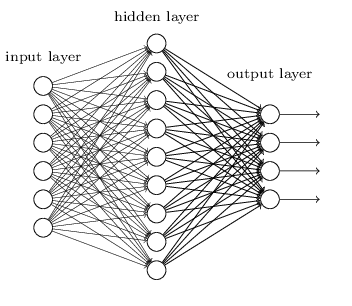

In [ ]:
%%time
def create_model_architecture(input_size):
    # create input layer 
    input_layer = layers.Input((input_size, ), sparse=True)
    
    # create hidden layer
    hidden_layer = layers.Dense(100, activation="relu")(input_layer)
    
    # create output layer
#     output_layer = layers.Dense(1, activation="sigmoid")(hidden_layer)
    output_layer = layers.Dense(1, activation="softmax")(hidden_layer) #use softmax for mulitclass classification

    classifier = models.Model(inputs = input_layer, outputs = output_layer)
    classifier.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    return classifier 

classifier = create_model_architecture(xtrain_tfidf_ngram.shape[1])
accuracy = train_model(classifier, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, is_neural_net=True)
print("NN, Ngram Level TF IDF Vectors",  accuracy)

Example of expected output:

> Epoch 1/1 <br>
> 7500/7500 [==============================] - 1s 67us/step - loss: 0.6909 <br>
> NN, Ngram Level TF IDF Vectors 0.5296 <br>

## 3.7 Deep Neural Networks

Deep Neural Networks are more complex neural networks in which the hidden layers performs much more complex operations than simple sigmoid or relu activations. Different types of deep learning models can be applied in text classification problems.

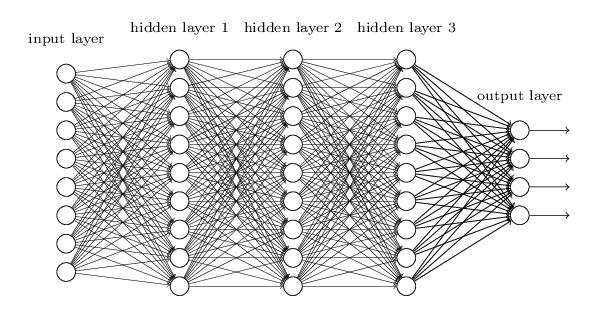

### 3.7.1 Convolutional Neural Network

In Convolutional neural networks, convolutions over the input layer are used to compute the output. This results in local connections, where each region of the input is connected to a neuron in the output. Each layer applies different filters and combines their results.

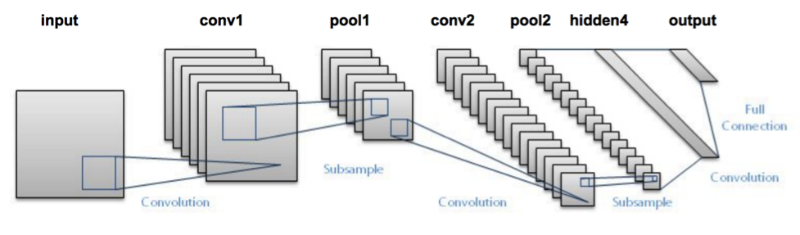

Read more about Convolutional Neural Networks here: 
https://www.analyticsvidhya.com/blog/2017/06/architecture-of-convolutional-neural-networks-simplified-demystified/

In [ ]:
%%time
def create_cnn():
    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the convolutional Layer
    conv_layer = layers.Convolution1D(100, 3, activation="relu")(embedding_layer)

    # Add the pooling Layer
    pooling_layer = layers.GlobalMaxPool1D()(conv_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(pooling_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    #     output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)
    output_layer2 = layers.Dense(1, activation="softmax")(output_layer1) #use softmax for mulitclass classification

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
    return model

classifier = create_cnn()
accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
print("CNN, Word Embeddings",  accuracy)

Example of expected output:

> Epoch 1/1 <br>
> 7500/7500 [==============================] - 12s 2ms/step - loss: 0.5847 <br>
> CNN, Word Embeddings 0.5296 <br>

### 3.7.2 Recurrent Neural Network – LSTM

Unlike Feed-forward neural networks in which activation outputs are propagated only in one direction, the activation outputs from neurons propagate in both directions (from inputs to outputs and from outputs to inputs) in Recurrent Neural Networks. This creates loops in the neural network architecture which acts as a ‘memory state’ of the neurons. This state allows the neurons an ability to remember what have been learned so far.

The memory state in RNNs gives an advantage over traditional neural networks but a problem called Vanishing Gradient is associated with them. In this problem, while learning with a large number of layers, it becomes really hard for the network to learn and tune the parameters of the earlier layers. To address this problem, A new type of RNNs called LSTMs (Long Short Term Memory) Models have been developed.

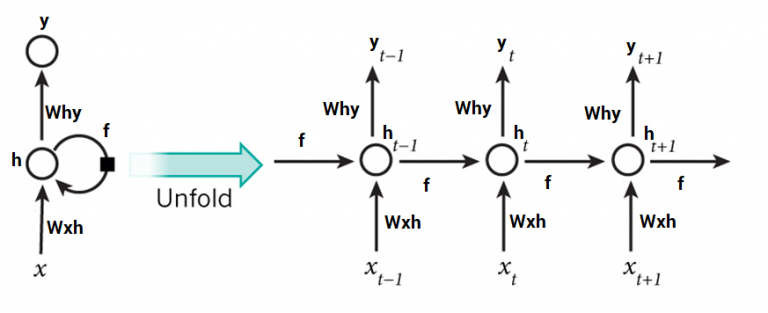

Read more about LSTMs here:
https://www.analyticsvidhya.com/blog/2017/12/fundamentals-of-deep-learning-introduction-to-lstm/

In [ ]:
%%time
def create_rnn_lstm():
    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the LSTM Layer
    lstm_layer = layers.LSTM(100)(embedding_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    #     output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)
    output_layer2 = layers.Dense(1, activation="softmax")(output_layer1) #use softmax for mulitclass classification

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
    return model

classifier = create_rnn_lstm()
accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
print("RNN-LSTM, Word Embeddings",  accuracy)

Example of expected output:

> Epoch 1/1 <br>
> 7500/7500 [==============================] - 22s 3ms/step - loss: 0.6899 <br>
> RNN-LSTM, Word Embeddings 0.5124 <br>

### 3.7.3 Recurrent Neural Network – GRU

Gated Recurrent Units are another form of recurrent neural networks. Lets add a layer of GRU instead of LSTM in our network.

In [ ]:
%%time
def create_rnn_gru():
    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the GRU Layer
    lstm_layer = layers.GRU(100)(embedding_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    #     output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)
    output_layer2 = layers.Dense(1, activation="softmax")(output_layer1) #use softmax for mulitclass classification

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
    return model

classifier = create_rnn_gru()
accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
print("RNN-GRU, Word Embeddings",  accuracy)

Example of expected output:

> Epoch 1/1 <br>
> 7500/7500 [==============================] - 19s 3ms/step - loss: 0.6898 <br>
> RNN-GRU, Word Embeddings 0.5124 <br>

### 3.7.4 Bidirectional RNN

RNN layers can be wrapped in Bidirectional layers as well. Lets wrap our GRU layer in bidirectional layer.

In [ ]:
%%time
def create_bidirectional_rnn():
    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the LSTM Layer
    lstm_layer = layers.Bidirectional(layers.GRU(100))(embedding_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    #     output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)
    output_layer2 = layers.Dense(1, activation="softmax")(output_layer1) #use softmax for mulitclass classification

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
    return model

classifier = create_bidirectional_rnn()
accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
print("RNN-Bidirectional, Word Embeddings",  accuracy)

Example of expected output:

> Epoch 1/1 <br>
> 7500/7500 [==============================] - 32s 4ms/step - loss: 0.6889 <br>
> RNN-Bidirectional, Word Embeddings 0.5124 <br>

### 3.7.5 Recurrent Convolutional Neural Network

Once the essential architectures have been tried out, one can try different variants of these layers such as recurrent convolutional neural network. Another variants can be:

1. Hierarichial Attention Networks
2. Sequence to Sequence Models with Attention
3. Bidirectional Recurrent Convolutional Neural Networks
4. CNNs and RNNs with more number of layers

In [ ]:
%%time
def create_rcnn():
    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)
    
    # Add the recurrent layer
    rnn_layer = layers.Bidirectional(layers.GRU(50, return_sequences=True))(embedding_layer)
    
    # Add the convolutional Layer
    conv_layer = layers.Convolution1D(100, 3, activation="relu")(embedding_layer)

    # Add the pooling Layer
    pooling_layer = layers.GlobalMaxPool1D()(conv_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(pooling_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
#     output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)
    output_layer2 = layers.Dense(1, activation="softmax")(output_layer1) #use softmax for mulitclass classification

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
    return model

classifier = create_rcnn()
accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
print("CNN, Word Embeddings",  accuracy)

Example of expected output:

> Epoch 1/1 <br>
> 7500/7500 [==============================] - 11s 1ms/step - loss: 0.6902 <br>
> CNN, Word Embeddings 0.5124 <br>

The next step is **Improving Text Classification Models** 

For more info go to: https://www.analyticsvidhya.com/blog/2018/04/a-comprehensive-guide-to-understand-and-implement-text-classification-in-python/